# Imports

In [2]:
import os
import math
import json
import collections

import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder

from src.pre_processing.macros import column_groups, DATA_PATH, DATA_SPLIT_PATH, ORIGINAL_DATASET_NAME, DATA_PREPROC_PATH, RES_PATH

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# Load Pre-processed

In [3]:
df = pd.read_csv(os.path.join(DATA_PREPROC_PATH, "final.csv"), low_memory=False)
df = df.set_index("id_questionnaire")
print(df.shape)
df

(80174, 159)


,id_student_original,id_year,id_grade,id_class_group,id_school,id_student_16_19,id_school_16_19,score_MAT,level_MAT,score_LEN,...,t_extent_of_student_involvement_during_class,t_extent_of_teaching_methods_variety,t_extent_of_opinion_on_school,t_extent_of_class_behaviour,t_extent_of_resource_variety,t_extent_of_good_work_by_non_teachers,t_number_of_individual_training_topics,t_number_of_subjects_taught,t_extent_of_satisfaction_job_and_school,t_extent_of_results_satisfaction
id_questionnaire,,,,,,,,,,,,,,,,,,,,,
1,33613.0,2016,3,A,2415.0,14374.0,569.0,564.8700,3.0,535.1500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19294.0,2016,3,A,1842.0,8001.0,273.0,388.3400,1.0,293.7000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19587.0,2016,3,NaN,1432.0,8142.0,82.0,386.5900,1.0,514.8100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29985.0,2016,3,A,2280.0,12800.0,505.0,487.7600,2.0,449.2500,...,0.555556,0.666667,1.000000,0.500000,0.458333,0.555556,NaN,NaN,NaN,0.666667
5,6982.0,2016,3,A,2040.0,2606.0,390.0,709.7900,4.0,598.7200,...,0.666667,0.733333,1.000000,0.833333,0.625000,0.888889,1.0,NaN,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83853,2500.0,2019,6,B,1278.0,NaN,271.0,400.8625,2.0,446.6522,...,0.555556,0.800000,1.000000,0.500000,0.416667,1.000000,1.0,NaN,1.000000,0.166667
83854,5784.0,2019,6,A,1079.0,NaN,78.0,597.0243,3.0,632.6043,...,0.666667,0.733333,0.666667,0.666667,0.500000,1.000000,1.0,NaN,0.722222,0.500000
83855,7708.0,2019,6,X,1486.0,3036.0,459.0,707.9254,4.0,400.2761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_sel = df[(df["id_year"] == 2016) & (df["id_grade"] == 3)]
df_sel.shape

(19466, 159)

In [51]:
df_sel["t_gender"].isna().sum()

np.int64(6010)

In [40]:
df.groupby(by=["id_year", "id_grade"])[["id_year", "id_grade"]].count()

id_year  id_grade
id_year id_grade                   
2016    3           19466     19466
        6           19928     19928
2017    3            3056      3056
        4            2931      2931
        6            3110      3110
2018    3            3238      3238
        4            3106      3106
        6            3277      3277
2019    4            3199      3199
        6           18863     18863

In [37]:
df[["id_year", "id_grade", "t_gender"]].groupby(by=["id_year", "id_grade"])["t_gender"].count()

id_year  id_grade
2016     3           13456
         6           13001
2017     3               0
         4               0
         6               0
2018     3            3055
         4               0
         6            3003
2019     4               0
         6           15406
Name: t_gender, dtype: int64

In [41]:
df[["id_year", "id_grade", "f_ESCS"]].groupby(by=["id_year", "id_grade"])["f_ESCS"].count()

id_year  id_grade
2016     3           13964
         6           14702
2017     3            1549
         4            2889
         6            1872
2018     3            2929
         4            3030
         6            2922
2019     4            3116
         6           11784
Name: f_ESCS, dtype: int64

<Axes: ylabel='id_year,id_grade'>

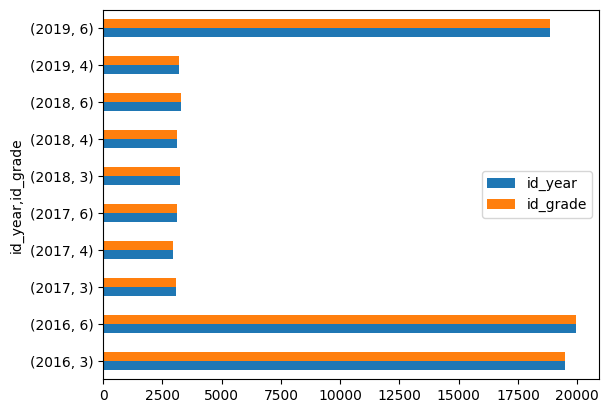

In [17]:
df.groupby(by=["id_year", "id_grade"])[["id_year", "id_grade"]].count().plot.barh()

In [64]:
current_df = df[(df["id_year"] == 2016) & (df["id_grade"] == 3)]

In [66]:
student_df = current_df[[col for col in df.columns if col.startswith("t_")]]

In [65]:
student_df
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Apply Ordinal Encoding
encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])

t_gender                                                 13456
t_age                                                    13117
t_number_of_years_as_teacher                             13391
t_number_of_years_in_school                              13258
t_has_taught_same_group_last_two_years                   13455
t_number_of_students_in_group                            13409
t_number_of_students_disadvanteged_economic_situation     7532
t_number_of_foreign_students_speaking_spanish             9757
t_number_of_foreign_students_not_speaking_spanish         9715
t_number_of_teaching_hours_per_week                      13197
t_average_explanation_time                               13501
t_degree_of_individual_training_incidence                12091
t_seat_configuration                                     13448
t_behaviour_problems_solution                            13406
t_number_of_meetings_with_families                       12794
t_is_enrolled_in_school_training_plan                  